# Analyse des données de la Premiere League

**Objectif:** Proposer à notre client Les meilleurs buteurs!

In [1]:
# importer packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importer les données

In [17]:
df=pd.read_csv('Football Players Stats (Premier League 2021-2022).csv',encoding='ISO-8859-1')
df

,Player,Team,Nation,Pos,Age,MP,Starts,Min,90s,Gls,...,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1
0,Bukayo Saka,Arsenal,eng ENG,"FW,MF",19.0,38,36,"2,978",33.1,11.0,...,0.48,9.7,8.2,6.9,15.2,0.29,0.21,0.50,0.25,0.46
1,Gabriel Dos Santos,Arsenal,br BRA,DF,23.0,35,35,"3,063",34.0,5.0,...,0.15,2.7,2.7,0.8,3.5,0.08,0.02,0.10,0.08,0.10
2,Aaron Ramsdale,Arsenal,eng ENG,GK,23.0,34,34,"3,060",34.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
3,Ben White,Arsenal,eng ENG,DF,23.0,32,32,"2,880",32.0,0.0,...,0.00,1.0,1.0,0.6,1.6,0.03,0.02,0.05,0.03,0.05
4,Martin Ødegaard,Arsenal,no NOR,MF,22.0,36,32,"2,785",30.9,7.0,...,0.36,4.8,4.8,6.8,11.6,0.16,0.22,0.38,0.16,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,Christian Marques,Wolverhampton Wanderers,ch SUI,DF,18.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,Yerson Mosquera,Wolverhampton Wanderers,co COL,DF,20.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
688,Louie Moulden,Wolverhampton Wanderers,eng ENG,GK,19.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
689,Dion Sanderson,Wolverhampton Wanderers,eng ENG,DF,21.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player     691 non-null    object 
 1   Team       691 non-null    object 
 2   Nation     688 non-null    object 
 3   Pos        691 non-null    object 
 4   Age        687 non-null    float64
 5   MP         691 non-null    int64  
 6   Starts     691 non-null    int64  
 7   Min        546 non-null    object 
 8   90s        547 non-null    float64
 9   Gls        547 non-null    float64
 10  Ast        547 non-null    float64
 11  G-PK       547 non-null    float64
 12  PK         547 non-null    float64
 13  PKatt      547 non-null    float64
 14  CrdY       547 non-null    float64
 15  CrdR       547 non-null    float64
 16  Gls.1      546 non-null    float64
 17  Ast.1      546 non-null    float64
 18  G+A        546 non-null    float64
 19  G-PK.1     546 non-null    float64
 20  G+A-PK    

In [8]:
df['Pos'].unique()

array(['FW,MF', 'DF', 'GK', 'MF', 'MF,DF', 'MF,FW', 'FW', 'DF,MF',
       'DF,FW', 'FW,DF'], dtype=object)

# Evaluation des données

**Problèmes de qualités**
- Problème de type pour "Min"
- Valeurs manquantes

**Problèmes de structure**
- Pour la colonne "Nation": La meme information écrite deux fois: en majiscule et en miniscule, nous allons garder ce qui ecrit en majiscule.
- Pour la colnne "pos": nous allons prendre juste la premiere position du joueur

# Nettoyage de données

In [ ]:
# changer le type de min

On peut utiliser plusieurs méthodes:
- df['Min'].str.type("float")
- df['Min'].str.astype("float")
- pd.to_numeric(df['Min'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player     691 non-null    object 
 1   Team       691 non-null    object 
 2   Nation     688 non-null    object 
 3   Pos        691 non-null    object 
 4   Age        687 non-null    float64
 5   MP         691 non-null    int64  
 6   Starts     691 non-null    int64  
 7   Min        546 non-null    object 
 8   90s        547 non-null    float64
 9   Gls        547 non-null    float64
 10  Ast        547 non-null    float64
 11  G-PK       547 non-null    float64
 12  PK         547 non-null    float64
 13  PKatt      547 non-null    float64
 14  CrdY       547 non-null    float64
 15  CrdR       547 non-null    float64
 16  Gls.1      546 non-null    float64
 17  Ast.1      546 non-null    float64
 18  G+A        546 non-null    float64
 19  G-PK.1     546 non-null    float64
 20  G+A-PK    

In [19]:
# je dois d'abord supprimer la virgule
df['Min']=df['Min'].str.replace(',','')

In [24]:
df['Min']=df['Min'].astype("float")

In [25]:
# verification
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player     691 non-null    object 
 1   Team       691 non-null    object 
 2   Nation     688 non-null    object 
 3   Pos        691 non-null    object 
 4   Age        687 non-null    float64
 5   MP         691 non-null    int64  
 6   Starts     691 non-null    int64  
 7   Min        546 non-null    float64
 8   90s        547 non-null    float64
 9   Gls        547 non-null    float64
 10  Ast        547 non-null    float64
 11  G-PK       547 non-null    float64
 12  PK         547 non-null    float64
 13  PKatt      547 non-null    float64
 14  CrdY       547 non-null    float64
 15  CrdR       547 non-null    float64
 16  Gls.1      546 non-null    float64
 17  Ast.1      546 non-null    float64
 18  G+A        546 non-null    float64
 19  G-PK.1     546 non-null    float64
 20  G+A-PK    

In [26]:
# Valeurs manquantes
df.isnull().sum()

Player         0
Team           0
Nation         3
Pos            0
Age            4
MP             0
Starts         0
Min          145
90s          144
Gls          144
Ast          144
G-PK         144
PK           144
PKatt        144
CrdY         144
CrdR         144
Gls.1        145
Ast.1        145
G+A          145
G-PK.1       145
G+A-PK       145
xG           145
npxG         145
xA           145
npxG+xA      145
xG.1         145
xA.1         145
xG+xA        145
npxG.1       145
npxG+xA.1    145
dtype: int64

In [27]:
df[df['Nation'].isnull()]

,Player,Team,Nation,Pos,Age,MP,Starts,Min,90s,Gls,...,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1
318,Kris Moore,Leeds United,NaN,MF,NaN,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
548,Tyler Dibling,Southampton,NaN,MF,NaN,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
690,James Storer,Wolverhampton Wanderers,NaN,GK,NaN,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# supprimer les valeurs manquantes
df=df.dropna()

In [30]:
# verification
df.isnull().sum()

Player       0
Team         0
Nation       0
Pos          0
Age          0
MP           0
Starts       0
Min          0
90s          0
Gls          0
Ast          0
G-PK         0
PK           0
PKatt        0
CrdY         0
CrdR         0
Gls.1        0
Ast.1        0
G+A          0
G-PK.1       0
G+A-PK       0
xG           0
npxG         0
xA           0
npxG+xA      0
xG.1         0
xA.1         0
xG+xA        0
npxG.1       0
npxG+xA.1    0
dtype: int64

In [31]:
#Pour la colonne "Nation": La meme information écrite deux fois: en majiscule et en miniscule, nous allons garder ce qui ecrit en majiscule.

In [35]:
df['Nation']=df['Nation'].str.split().str[1]

<ipython-input-35-687d9cf94cb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Nation']=df['Nation'].str.split().str[1]


In [36]:
df

,Player,Team,Nation,Pos,Age,MP,Starts,Min,90s,Gls,...,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1
0,Bukayo Saka,Arsenal,ENG,"FW,MF",19.0,38,36,2978.0,33.1,11.0,...,0.48,9.7,8.2,6.9,15.2,0.29,0.21,0.50,0.25,0.46
1,Gabriel Dos Santos,Arsenal,BRA,DF,23.0,35,35,3063.0,34.0,5.0,...,0.15,2.7,2.7,0.8,3.5,0.08,0.02,0.10,0.08,0.10
2,Aaron Ramsdale,Arsenal,ENG,GK,23.0,34,34,3060.0,34.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
3,Ben White,Arsenal,ENG,DF,23.0,32,32,2880.0,32.0,0.0,...,0.00,1.0,1.0,0.6,1.6,0.03,0.02,0.05,0.03,0.05
4,Martin Ødegaard,Arsenal,NOR,MF,22.0,36,32,2785.0,30.9,7.0,...,0.36,4.8,4.8,6.8,11.6,0.16,0.22,0.38,0.16,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,Luke Cundle,Wolverhampton Wanderers,ENG,MF,19.0,4,2,180.0,2.0,0.0,...,0.00,0.0,0.0,0.2,0.2,0.00,0.12,0.12,0.00,0.12
679,Chiquinho,Wolverhampton Wanderers,POR,"DF,MF",21.0,8,1,208.0,2.3,0.0,...,1.30,0.3,0.3,0.6,0.9,0.13,0.27,0.41,0.13,0.41
680,John Ruddy,Wolverhampton Wanderers,ENG,GK,34.0,2,1,135.0,1.5,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
681,Chem Campbell,Wolverhampton Wanderers,WAL,MF,18.0,1,0,13.0,0.1,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00


In [38]:
#Pour la colnne "pos": nous allons prendre juste la premiere position du joueur
df['Pos']=df['Pos'].str.split(',').str[0]
df

<ipython-input-38-d96752f5000a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pos']=df['Pos'].str.split(',').str[0]


,Player,Team,Nation,Pos,Age,MP,Starts,Min,90s,Gls,...,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1
0,Bukayo Saka,Arsenal,ENG,FW,19.0,38,36,2978.0,33.1,11.0,...,0.48,9.7,8.2,6.9,15.2,0.29,0.21,0.50,0.25,0.46
1,Gabriel Dos Santos,Arsenal,BRA,DF,23.0,35,35,3063.0,34.0,5.0,...,0.15,2.7,2.7,0.8,3.5,0.08,0.02,0.10,0.08,0.10
2,Aaron Ramsdale,Arsenal,ENG,GK,23.0,34,34,3060.0,34.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
3,Ben White,Arsenal,ENG,DF,23.0,32,32,2880.0,32.0,0.0,...,0.00,1.0,1.0,0.6,1.6,0.03,0.02,0.05,0.03,0.05
4,Martin Ødegaard,Arsenal,NOR,MF,22.0,36,32,2785.0,30.9,7.0,...,0.36,4.8,4.8,6.8,11.6,0.16,0.22,0.38,0.16,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,Luke Cundle,Wolverhampton Wanderers,ENG,MF,19.0,4,2,180.0,2.0,0.0,...,0.00,0.0,0.0,0.2,0.2,0.00,0.12,0.12,0.00,0.12
679,Chiquinho,Wolverhampton Wanderers,POR,DF,21.0,8,1,208.0,2.3,0.0,...,1.30,0.3,0.3,0.6,0.9,0.13,0.27,0.41,0.13,0.41
680,John Ruddy,Wolverhampton Wanderers,ENG,GK,34.0,2,1,135.0,1.5,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
681,Chem Campbell,Wolverhampton Wanderers,WAL,MF,18.0,1,0,13.0,0.1,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00


# Valeurs abberantes

Notre objetifs c'est de trouver les meilleurs joueurs, donc nous allons nous baser sur la colonne: "Gls : Goals scored or allowed" et nous allons chercher les valeurs abberantes

In [39]:
# Methode Graphique

/Users/macbookair/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


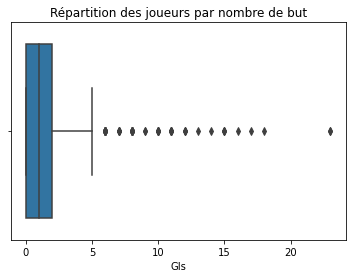

In [44]:
sns.boxplot(df['Gls'])
plt.title('Répartition des joueurs par nombre de but')
plt.show()

On voit sortir quelques valeurs abberantes: c'est des joueurs qui marque plus de buts que la limite superieur.

In [40]:
# Methode Analytique

In [46]:
#On calcule d'abord les quartiles:
Q1=df['Gls'].quantile(0.25)
Q3=df['Gls'].quantile(0.75)
print(Q1,Q3)

0.0 2.0


In [45]:
# autre méthode
df['Gls'].describe()

count    546.000000
mean       1.899267
std        3.257021
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max       23.000000
Name: Gls, dtype: float64

In [47]:
# calculer le IQR
IQR=Q3-Q1
IQR

2.0

In [48]:
# determiner la limite superieur et la limite inf
sup=Q3+1.5*IQR
inf=Q1-1.5*IQR
print(sup,inf)

5.0 -3.0


In [50]:
# Afficher les valeurs abberantes
buteurs=df[df['Gls']>sup]
buteurs

,Player,Team,Nation,Pos,Age,MP,Starts,Min,90s,Gls,...,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1
0,Bukayo Saka,Arsenal,ENG,FW,19.0,38,36,2978.0,33.1,11.0,...,0.48,9.7,8.2,6.9,15.2,0.29,0.21,0.50,0.25,0.46
4,Martin Ødegaard,Arsenal,NOR,MF,22.0,36,32,2785.0,30.9,7.0,...,0.36,4.8,4.8,6.8,11.6,0.16,0.22,0.38,0.16,0.38
8,Emile Smith Rowe,Arsenal,ENG,MF,21.0,33,21,1921.0,21.3,10.0,...,0.56,5.8,5.8,2.2,8.0,0.27,0.10,0.37,0.27,0.37
9,Martinelli,Arsenal,BRA,FW,20.0,29,21,1860.0,20.7,6.0,...,0.53,7.2,6.5,3.3,9.8,0.35,0.16,0.51,0.31,0.47
45,Ollie Watkins,Aston Villa,ENG,FW,25.0,35,33,2952.0,32.8,11.0,...,0.37,12.2,11.4,2.9,14.3,0.37,0.09,0.46,0.35,0.44
48,Jacob Ramsey,Aston Villa,ENG,MF,20.0,34,29,2467.0,27.4,6.0,...,0.26,3.8,3.8,2.0,5.8,0.14,0.07,0.21,0.14,0.21
50,Danny Ings,Aston Villa,ENG,FW,29.0,30,22,1898.0,21.1,7.0,...,0.57,7.3,6.6,2.0,8.6,0.35,0.10,0.44,0.31,0.41
86,Ivan Toney,Brentford,ENG,FW,25.0,33,32,2909.0,32.3,12.0,...,0.37,12.0,8.2,5.8,14.0,0.37,0.18,0.55,0.25,0.43
93,Yoane Wissa,Brentford,COD,FW,24.0,30,12,1284.0,14.3,7.0,...,0.56,3.7,3.7,0.7,4.4,0.26,0.05,0.31,0.26,0.31
121,Leandro Trossard,Brighton & Hove Albion,BEL,FW,26.0,34,32,2805.0,31.2,8.0,...,0.32,6.8,6.0,4.1,10.1,0.22,0.13,0.35,0.19,0.32


In [ ]:
# Analyse univariée

In [ ]:
# une variable quantitative (Age)

/Users/macbookair/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

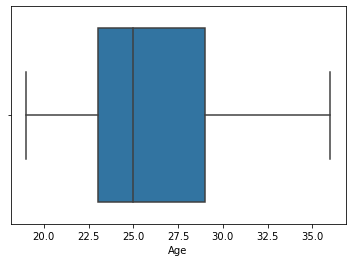

In [56]:
sns.boxplot(buteurs['Age'])

/Users/macbookair/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

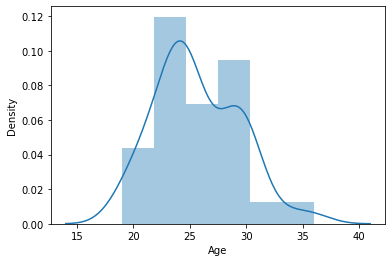

In [57]:
sns.distplot(buteurs['Age'])

In [ ]:
# on a plusieurs joueurs qui ont 23 ans et un autre groupe de 30 ans

In [ ]:
# une variable qualitative

<AxesSubplot:xlabel='count', ylabel='Team'>

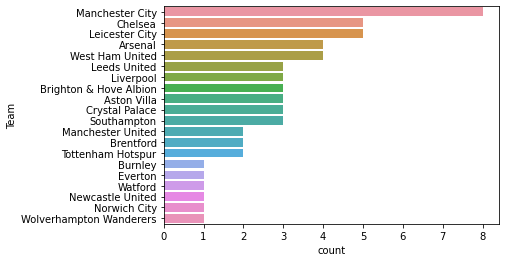

In [58]:
sns.countplot(y=buteurs['Team'],order=buteurs['Team'].value_counts().index)

/Users/macbookair/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pos', ylabel='count'>

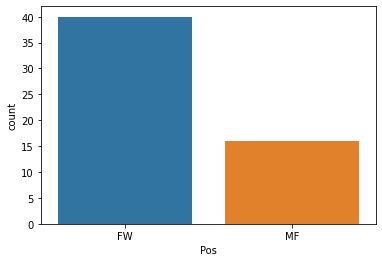

In [61]:
sns.countplot(buteurs['Pos'])

In [ ]:
# Les équipes avec le plus de buteurs sont man city et chelsea

In [ ]:
# Analyse bivariée

In [ ]:
# deux variables quantitatives => nuage de points

<AxesSubplot:xlabel='Age', ylabel='Gls'>

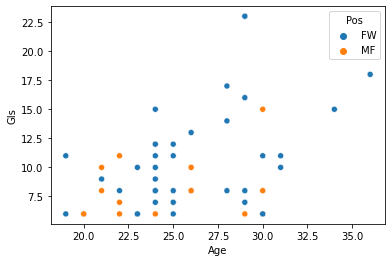

In [62]:
sns.scatterplot(data=buteurs,x='Age',y='Gls',hue='Pos')
plt.title('Le nombre de but par age et par poste')

In [ ]:
# deux variables qualitatives

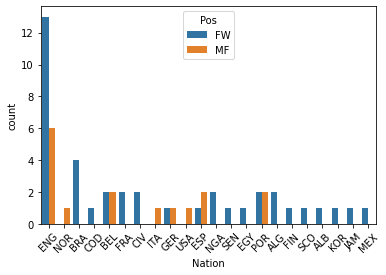

In [65]:
sns.countplot(data=buteurs,x='Nation',hue='Pos')
plt.xticks(rotation=45);

In [ ]:
# une variable quantitative et une variable qualitative

<AxesSubplot:xlabel='Pos', ylabel='Age'>

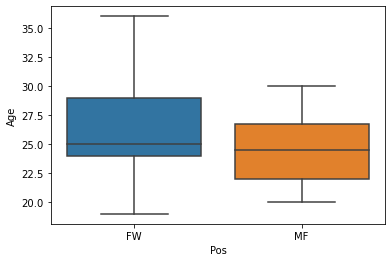

In [67]:
sns.boxplot(data=buteurs,x='Pos',y='Age')

<AxesSubplot:xlabel='Pos', ylabel='Gls'>

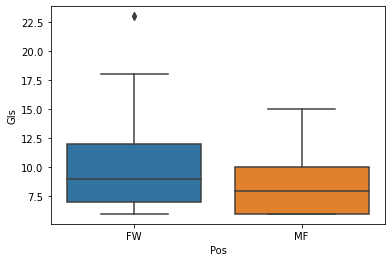

In [68]:
sns.boxplot(data=buteurs,x='Pos',y='Gls')

In [69]:
# les attaquantes sont plus vieux que les milieu
# les attaquants marquent plus

# Conclusion

Quel joueur recommander:
    - ce joueur doit etre un attaquant
    - Il doit être jeune
    - qui ne joue pas avec une grande équipe

In [70]:
buteurs[(buteurs['Pos']=='FW') &(buteurs['Age']<25)&(buteurs['Team']!='Manchester City') ]

,Player,Team,Nation,Pos,Age,MP,Starts,Min,90s,Gls,...,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1
0,Bukayo Saka,Arsenal,ENG,FW,19.0,38,36,2978.0,33.1,11.0,...,0.48,9.7,8.2,6.9,15.2,0.29,0.21,0.50,0.25,0.46
9,Martinelli,Arsenal,BRA,FW,20.0,29,21,1860.0,20.7,6.0,...,0.53,7.2,6.5,3.3,9.8,0.35,0.16,0.51,0.31,0.47
93,Yoane Wissa,Brentford,COD,FW,24.0,30,12,1284.0,14.3,7.0,...,0.56,3.7,3.7,0.7,4.4,0.26,0.05,0.31,0.26,0.31
123,Neal Maupay,Brighton & Hove Albion,FRA,FW,24.0,32,25,2276.0,25.3,8.0,...,0.36,7.7,6.2,2.2,8.4,0.30,0.09,0.39,0.24,0.33
160,Maxwel Cornet,Burnley,CIV,FW,24.0,26,21,1766.0,19.6,9.0,...,0.51,6.7,5.9,1.5,7.4,0.34,0.07,0.42,0.30,0.38
193,Kai Havertz,Chelsea,GER,FW,22.0,29,22,1809.0,20.1,8.0,...,0.55,9.7,9.7,2.0,11.6,0.48,0.10,0.58,0.48,0.58
226,Odsonne Édouard,Crystal Palace,FRA,FW,23.0,28,18,1564.0,17.4,6.0,...,0.46,6.9,6.1,2.3,8.4,0.39,0.13,0.53,0.35,0.48
250,Richarlison,Everton,BRA,FW,24.0,30,28,2523.0,28.0,10.0,...,0.43,10.2,7.9,2.4,10.3,0.36,0.09,0.45,0.28,0.37
288,Raphael Dias Belloli,Leeds United,BRA,FW,24.0,35,34,2915.0,32.4,11.0,...,0.31,11.2,8.2,6.8,15.0,0.35,0.21,0.56,0.25,0.46
289,Jack Harrison,Leeds United,ENG,FW,24.0,35,32,2639.0,29.3,8.0,...,0.31,4.0,4.0,2.6,6.6,0.14,0.09,0.22,0.14,0.22
